In [54]:
import numpy as np
from PIL import Image

In [55]:
image_path = "images/luntik.bmp"
image = Image.open(image_path)

width, height = image.size
red, green ,blue = zip(*image.getdata())

In [56]:
def svd_compression(color_matrix,N):
    A = np.array(color_matrix) # color_matrix

    ATA = np.dot(A.T,A)
    
    eigvals, eigvecs = np.linalg.eig(ATA)
    
    singular_values = np.sqrt(eigvals)
    singular_values_sorted = np.sorted = np.sort(singular_values)[::-1]
    
    V = eigvecs
    
    U = np.dot(A,V) / singular_values_sorted
    
    S = np.dot(U.T,np.dot(A,V))

    compressed_U = np.asarray(U)[:,:N]
    compressed_S =np.round(np.asarray(S)[:N,:N],decimals=5)
    compressed_Vt = np.asarray(V.T)[:N,:]

    return compressed_U, compressed_S, compressed_Vt


In [57]:
red_m = [red[i*width:i*width + width] for i in range(height)]
green_m = [green[i*width:i*width + width] for i in range(height)]
blue_m = [blue[i*width:i*width + width] for i in range(height)]

In [58]:
def new_matrix(red, green, blue):
    r_f = np.array(red).flatten()
    g_f = np.array(green).flatten()
    b_f = np.array(blue).flatten()

    new_pixels = list(zip(np.rint(r_f).astype(int), np.rint(g_f).astype(int), np.rint(b_f).astype(int)))
    
    image = Image.new("RGB", (width, height))
    image.putdata(new_pixels)

    image.save("images/compressed_primitive.bmp")

    return image

In [59]:
def mult(A,B,C):
    return np.real(np.dot(A,np.dot(B,C)))

In [60]:
N = 100

r = mult(*svd_compression(red_m, N))
g = mult(*svd_compression(green_m, N))
b = mult(*svd_compression(blue_m, N))

/tmp/ipykernel_24036/2379247795.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  new_pixels = list(zip(np.rint(r_f).astype(int), np.rint(g_f).astype(int), np.rint(b_f).astype(int)))


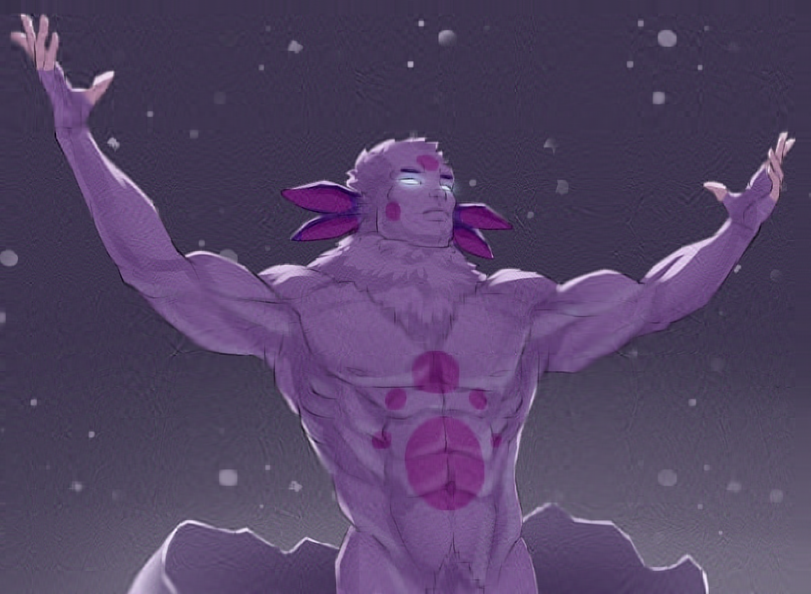

In [61]:
new_matrix(r,g,b)

In [62]:
import saver

rn = svd_compression(r,N)
gn = svd_compression(g,N)
bn = svd_compression(b,N)

name = "middle_repr_primitive"

saver.create(name,width,height,N)
saver.write_matrices(name,rn,gn,bn)
print(saver.file_size(name))

7054 Kbs


In [63]:
A =np.array([[1,2,3],[4,5,6],[7,8,9]])
print(np.linalg.eig(A.T@A))

EigResult(eigenvalues=array([2.83858587e+02, 1.14141342e+00, 7.28303082e-15]), eigenvectors=array([[-0.47967118, -0.77669099,  0.40824829],
       [-0.57236779, -0.07568647, -0.81649658],
       [-0.66506441,  0.62531805,  0.40824829]]))
